In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from helpers.plot_helpers import *
from helpers.computational_tools import *
from helpers.dynamic_model import dyn_model, dyn_model_SSD
%load_ext autoreload
%autoreload 3
import warnings
warnings.filterwarnings("ignore")

In [2]:
default_rcParams({'figure.subplot.wspace': 0.05, 'figure.subplot.hspace': 0.15, 'font.size': 12})
def plot_timeseries(exps=['R2/bare'], labels=None, tmax=30000):
    plt.figure(figsize=(10,10))
    if labels is None:
        labels=exps
    for exp, label in zip(exps, labels):
        try:
            ds = xr.open_dataset(f'/home/ctrsp-2024/pp2681/experiments/NeverWorld2/{exp}/output/ocean.stats.nc', decode_times=False)
        except:
            ds = xr.open_dataset(f'/home/ctrsp-2024/pp2681/experiments/NeverWorld2/{exp}/ocean.stats.nc', decode_times=False)
        plt.subplot(3,1,1)
        ds.max_CFL_lin.plot()
        plt.xlabel('Days')
        ticks = [0,int(tmax/3),int(tmax*2/3),int(tmax)]
        plt.xticks(ticks,ticks)
        plt.xlim([0,tmax])
        plt.grid()

        plt.subplot(3,1,2)
        (ds.KE.sum('Layer')).plot()
        plt.xlabel('Days')
        plt.xticks(ticks,ticks)
        plt.axhline(y=2.45e+18, color='k')
        plt.xlim([0,tmax])
        plt.grid()

        plt.subplot(3,1,3)
        (ds.APE.sum('Interface')).plot(label=label)
        plt.xlabel('Days')
        plt.xticks(ticks,ticks)
        plt.axhline(y=0.958e+20, color='k')
        plt.xlim([0,tmax])
        plt.grid()
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1,1))

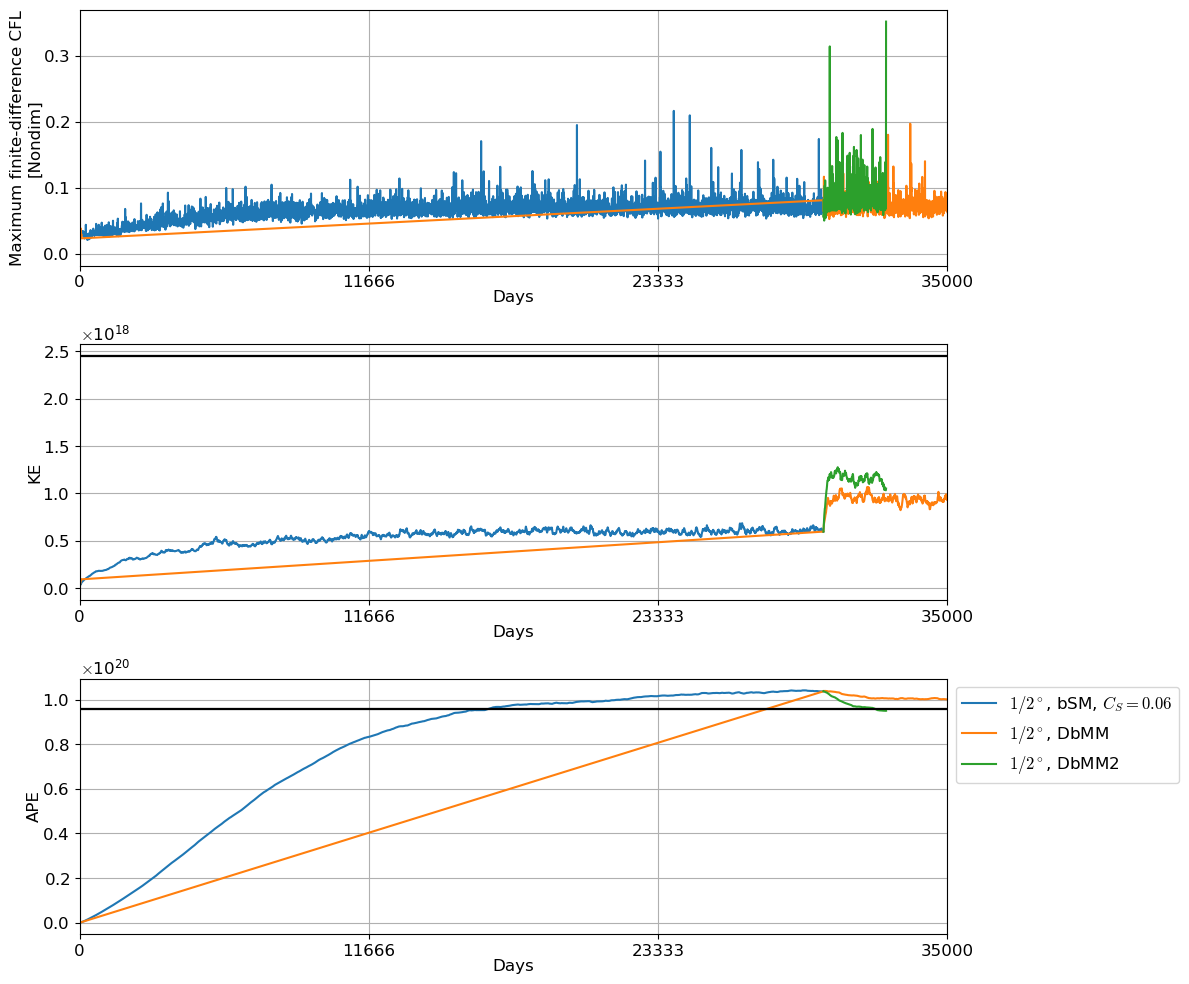

In [3]:
plot_timeseries(['R4/bare', 'R4/DbMM', 'R4/DbMM2'], ['$1/2^\circ$, bSM, $C_S=0.06$', '$1/2^\circ$, DbMM', '$1/2^\circ$, DbMM2'], tmax=35000)
#plt.savefig('NW2-R2.png', dpi=150, bbox_inches='tight')

In [306]:
ds = xr.open_dataset('/home/ctrsp-2024/pp2681/experiments/NeverWorld2/R4/DbMM/output/snapshots_00034020.nc', decode_times=False)

In [321]:
ds_bare = xr.open_dataset('/home/ctrsp-2024/pp2681/experiments/NeverWorld2/R4/bare/output/snapshots_00029010.nc', decode_times=False)

In [17]:
def KEz(ds, h=True):
    if h:
        return 0.5 * (ds.h * (remesh(ds.u**2, ds.h) + remesh(ds.v**2, ds.h)))
    else:
        return 0.5 * ((remesh(ds.u**2, ds.h) + remesh(ds.v**2, ds.h)))

In [326]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    KE = KEz(ds).compute()

In [327]:
KE_bare = KEz(ds_bare).compute()

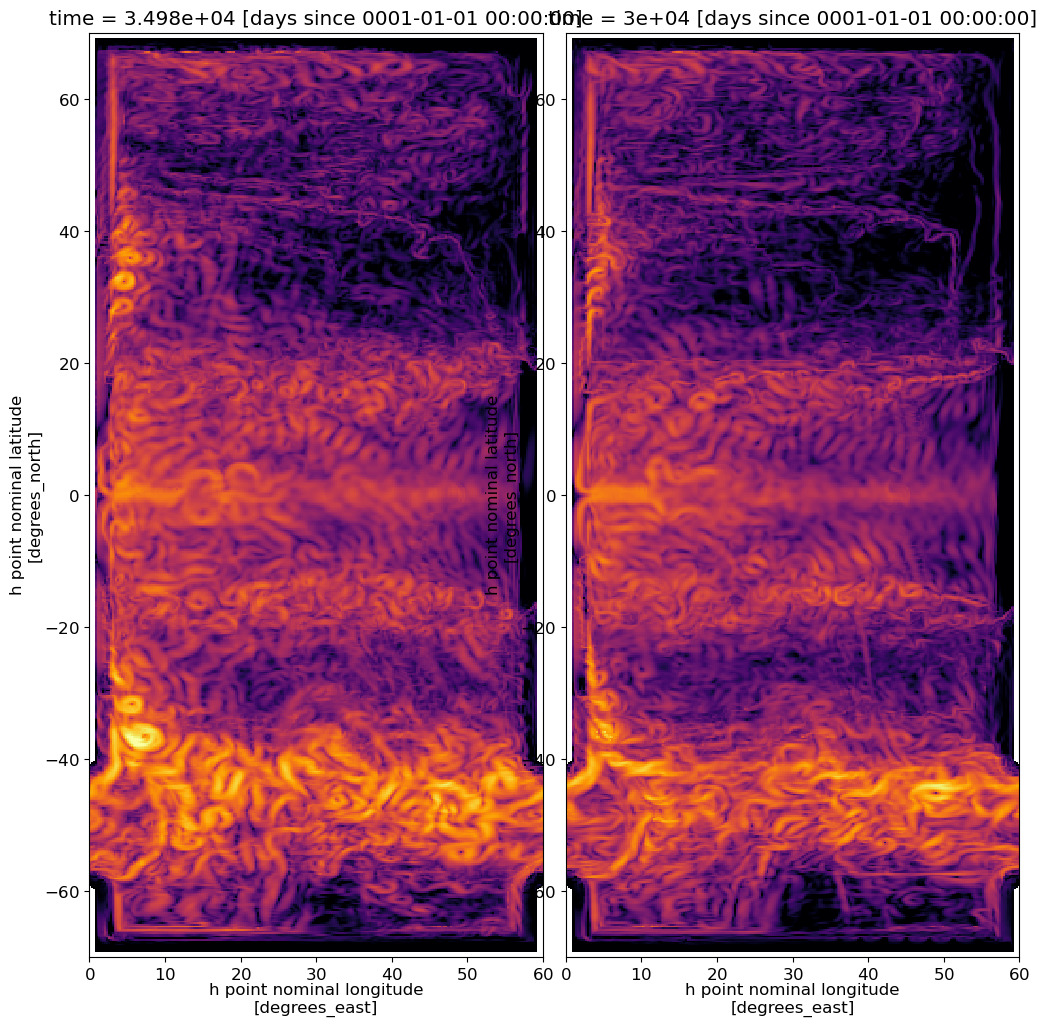

In [331]:
import matplotlib as mpl
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
KE.isel(time=-1).sum('zl').plot.imshow(
            norm=mpl.colors.LogNorm(vmin=1e-1, vmax=1e+3),
            cmap='inferno',
            add_colorbar=False,
            interpolation='none'
        )
plt.subplot(1,2,2)
KE_bare.isel(time=-1).sum('zl').plot.imshow(
            norm=mpl.colors.LogNorm(vmin=1e-1, vmax=1e+3),
            cmap='inferno',
            add_colorbar=False,
            interpolation='none'
        )
#plt.tight_layout()

In [333]:
e0 = ds.e.isel(xh=0).mean('time')

<xarray.DataArray 'e' (zi: 16, yh: 560)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * yh       (yh) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
    xh       float64 0.125
  * zi       (zi) float64 1.022e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03

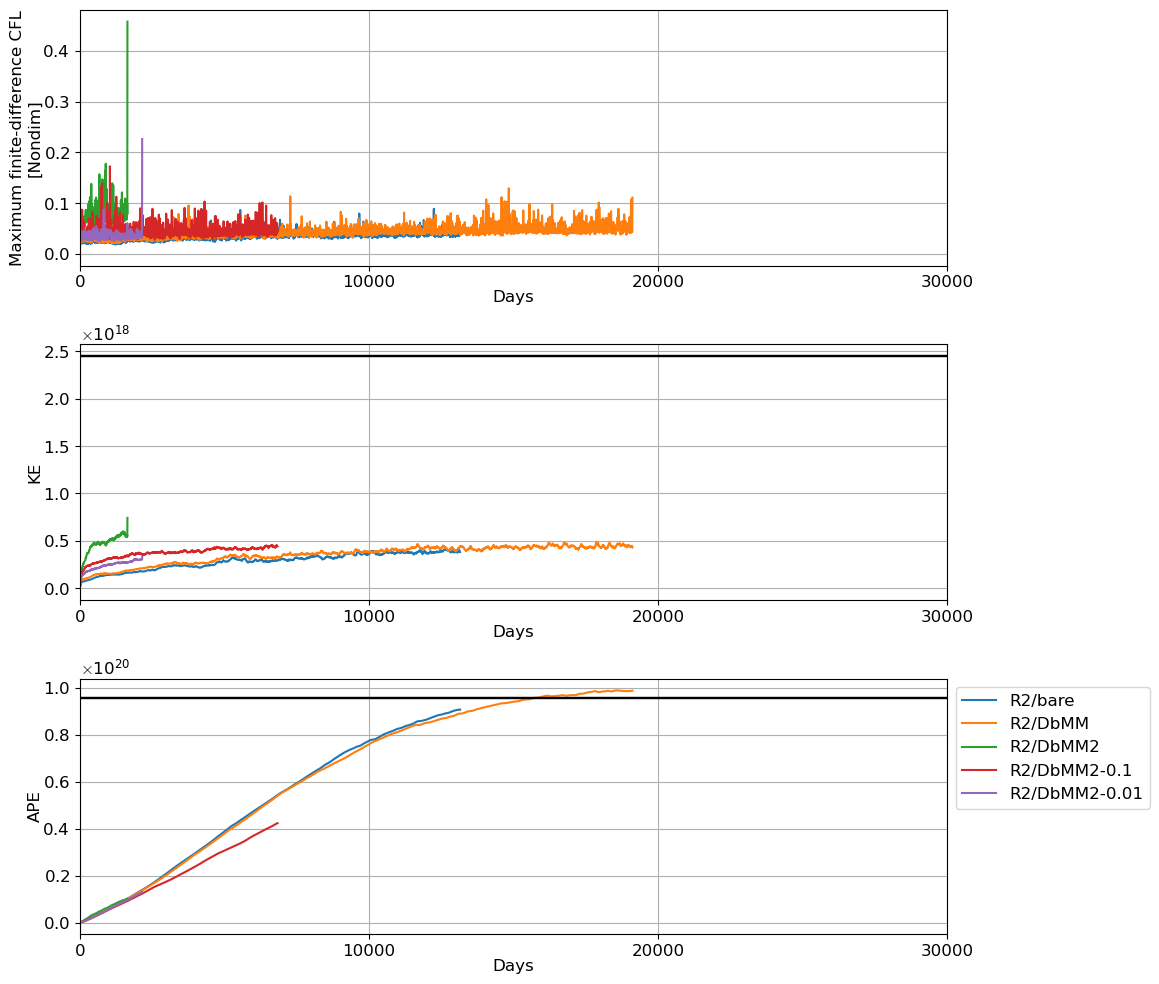

In [6]:
plot_timeseries(['R2/bare', 'R2/DbMM', 'R2/DbMM2', 'R2/DbMM2-0.1', 'R2/DbMM2-0.01'],  tmax=30000)
#plt.savefig('NW2-R2.png', dpi=150, bbox_inches='tight')

In [45]:
ds = xr.open_dataset('/home/ctrsp-2024/pp2681/experiments/NeverWorld2/R2/DbMM/snapshots_00005010.nc', decode_times=False)

In [8]:
ds_bare = xr.open_dataset('/home/ctrsp-2024/pp2681/experiments/NeverWorld2/R2/bare/output/snapshots_00005010.nc', decode_times=False)

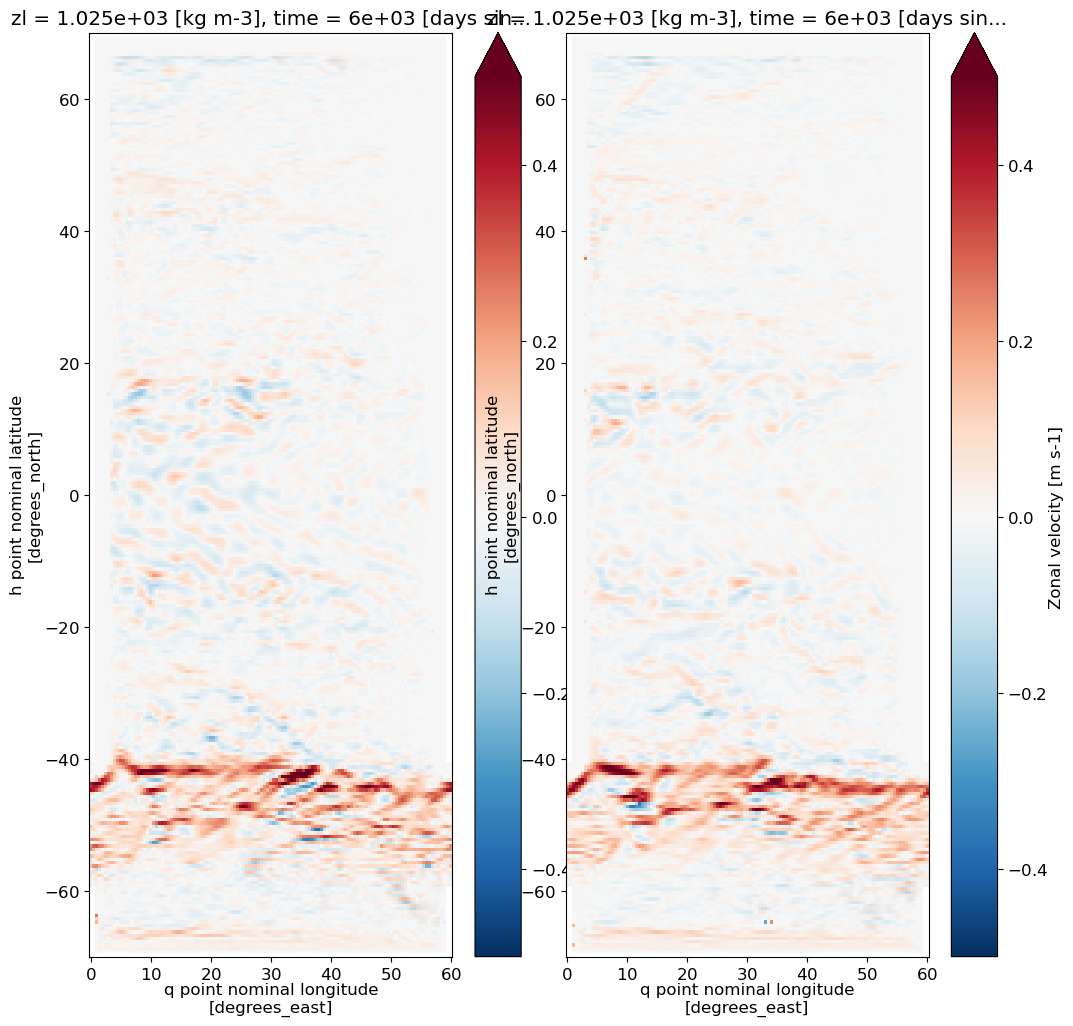

In [46]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
ds.u.isel(time=-1,zl=5).plot(vmin=-0.5)
plt.subplot(1,2,2)
ds_bare.u.isel(time=-1,zl=5).plot(vmin=-0.5)

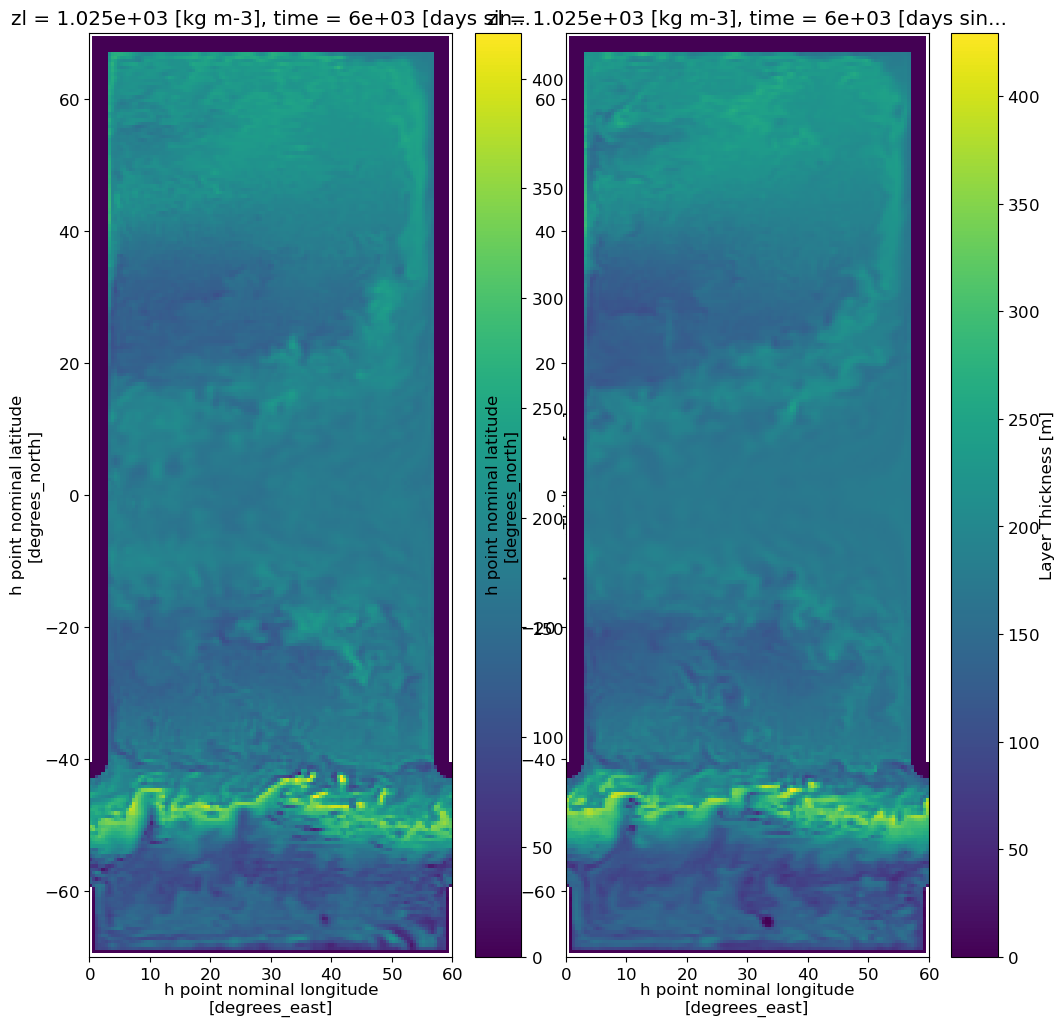

In [48]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
ds.h.isel(time=-1,zl=5).plot()
plt.subplot(1,2,2)
ds_bare.h.isel(time=-1,zl=5).plot()

In [49]:
KE = KEz(ds).sum('zl').isel(time=-1).compute()

In [50]:
KE_bare = KEz(ds_bare).sum('zl').isel(time=-1).compute()

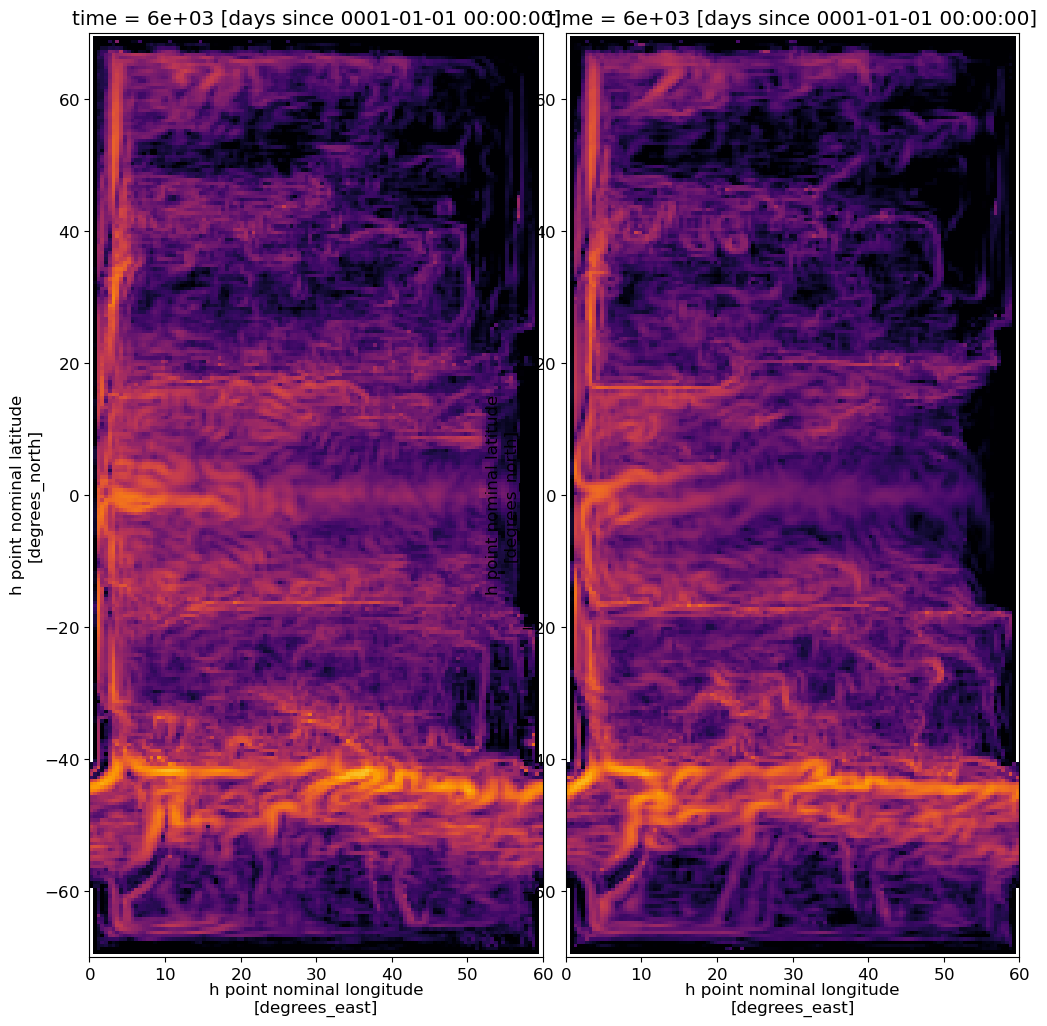

In [51]:
import matplotlib as mpl
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
KE.plot.imshow(
            norm=mpl.colors.LogNorm(vmin=1e-1, vmax=1e+3),
            cmap='inferno',
            add_colorbar=False,
            interpolation='none'
        )
plt.subplot(1,2,2)
KE_bare.plot.imshow(
            norm=mpl.colors.LogNorm(vmin=1e-1, vmax=1e+3),
            cmap='inferno',
            add_colorbar=False,
            interpolation='none'
        )
#plt.tight_layout()

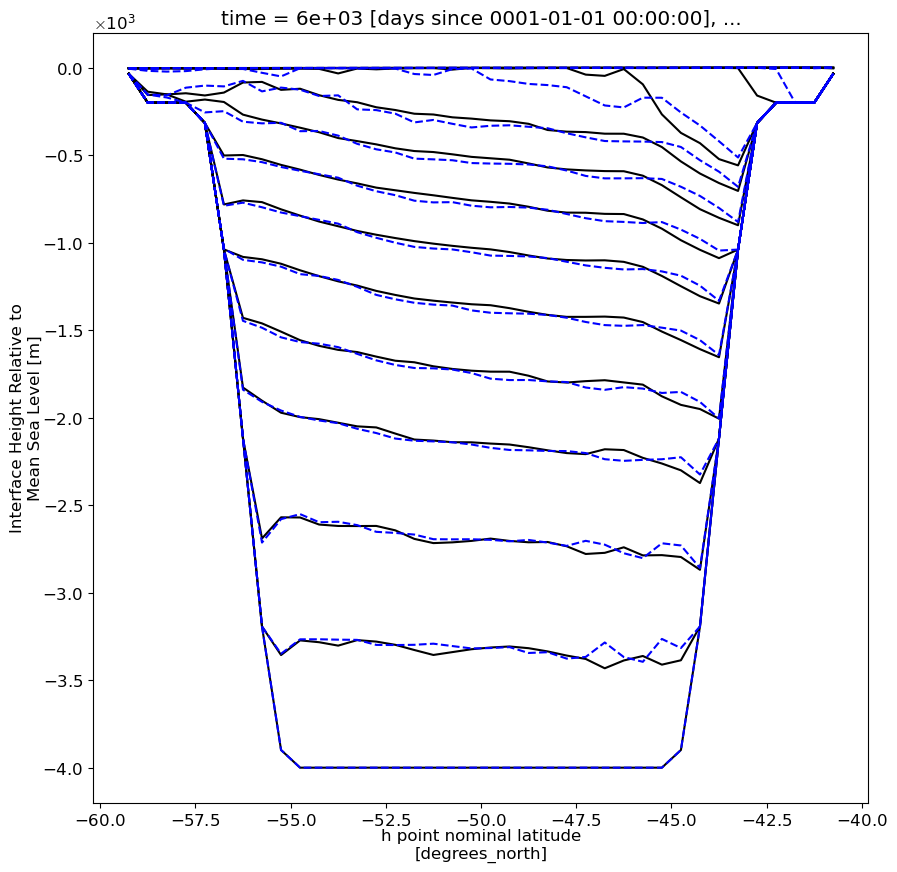

In [52]:
e = ds.e.isel(time=-1).sel(xh=0, method='nearest').compute()
e_bare = ds_bare.e.isel(time=-1).sel(xh=0, method='nearest').compute()
plt.figure(figsize=(10,10))
for ee in e_bare:
    ee.plot(color='k')
for ee in e:
    ee.plot(color='b', ls='--')

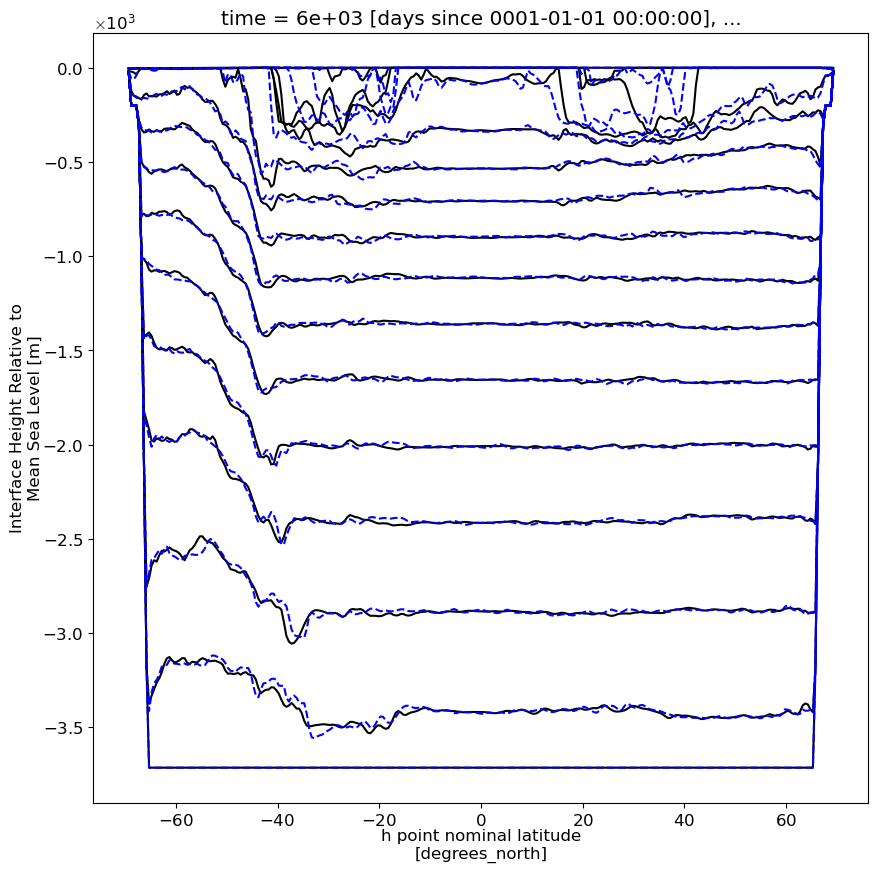

In [53]:
e = ds.e.isel(time=-1).sel(xh=45, method='nearest').compute()
e_bare = ds_bare.e.isel(time=-1).sel(xh=45, method='nearest').compute()
plt.figure(figsize=(10,10))
for ee in e_bare:
    ee.plot(color='k')
for ee in e:
    ee.plot(color='b', ls='--')

# Analyze the momentum fluxes

In [180]:
prog = xr.open_dataset('/home/ctrsp-2024/pp2681/experiments/NeverWorld2/test-R2/pg23_00013001.nc', decode_times=False).isel(time=0)

In [181]:
static =  xr.open_dataset('/home/ctrsp-2024/pp2681/experiments/NeverWorld2/R2/bare/output/ocean_geometry.nc'
                         ).rename({'lonh':'xh', 'lath':'yh', 'lonq':'xq', 'latq':'yq'})

In [182]:
import xgcm
grid = xgcm.Grid(static, coords={
            'X': {'center': 'xh', 'outer': 'xq'},
            'Y': {'center': 'yh', 'outer': 'yq'}},
            boundary={'X': 'fill', 'Y': 'fill'},
            fill_value = {'X': 0, 'Y': 0})
static['wet_u']=np.floor(grid.interp(static.wet,'X'))
static['wet_v']=np.floor(grid.interp(static.wet,'Y'))
static['wet_c']=np.floor(grid.interp(static.wet,['X','Y']))

In [183]:
from helpers.dynamic_model import dyn_model_SSD

In [184]:
dyn = dyn_model(prog.u, prog.v, static, ssm=True, reynolds=True, tf_iter=2)

In [185]:
leo_x = dyn['leo_x'].compute()
leo_y = dyn['leo_y'].compute()
bx = dyn['bx_base'].compute()
by = dyn['by_base'].compute()
CAu = prog.CAu.compute().drop_vars('zl')
CAv = prog.CAv.compute().drop_vars('zl')

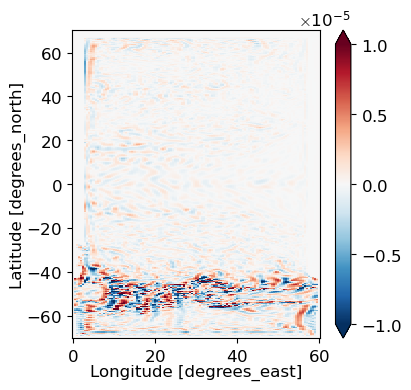

In [189]:
dyn['vort_xy'].isel(zl=5).plot(vmin=-1e-5)

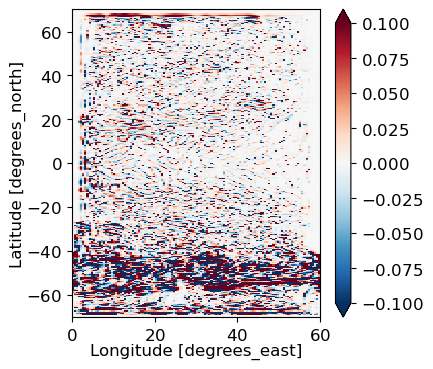

In [211]:
(bx*20 / (grid.interp(dyn['vort_xy'],'X') + 1e-7)).isel(zl=5).plot(vmax=0.1)

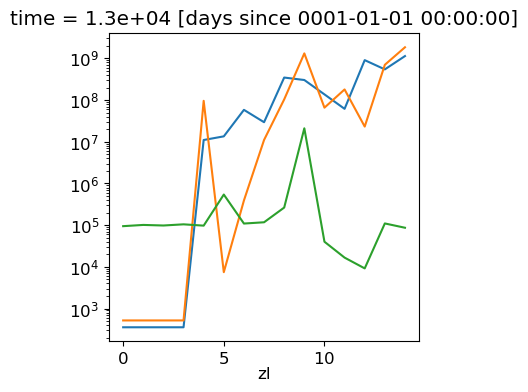

In [120]:
(np.abs(bx / grid.interp(dyn['vort_xy'],'X'))).max(['xh','yq']).plot()
(np.abs(leo_x / grid.interp(dyn['vort_xy'],'X'))).max(['xh','yq']).plot()
(np.abs(CAv / grid.interp(dyn['vort_xy'],'X'))).max(['xh','yq']).plot()
plt.yscale('log')

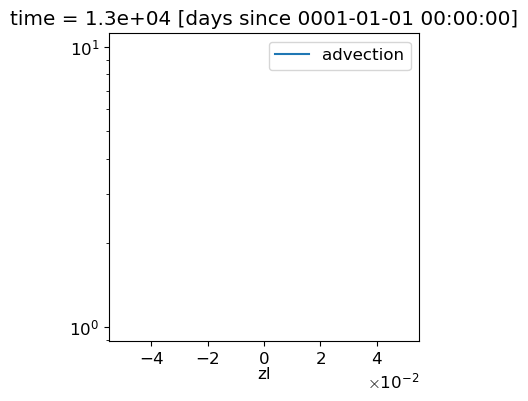

In [126]:
#(np.abs(by / grid.interp(dyn['vort_xy'],'Y'))).max(['xq','yh']).plot(label='Reynolds')
#(np.abs(leo_y / grid.interp(dyn['vort_xy'],'Y'))).max(['xq','yh']).plot(label='leo')
(np.abs(CAu / grid.interp(dyn['vort_xy']+static.f,'Y'))).max(['xq','yh']).plot(label='advection')
plt.yscale('log')
plt.legend()

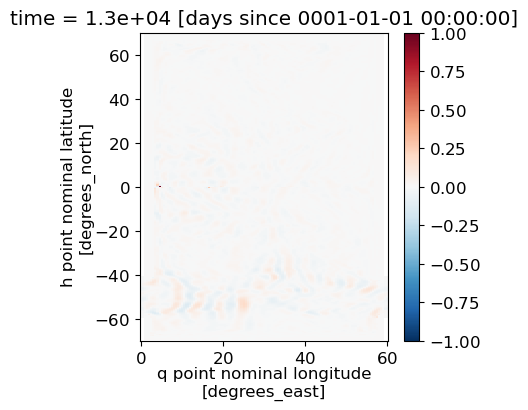

In [158]:
(CAu / (grid.interp(dyn['vort_xy']+static.f,'Y')+1e-40)).isel(zl=10).plot(vmax=1)

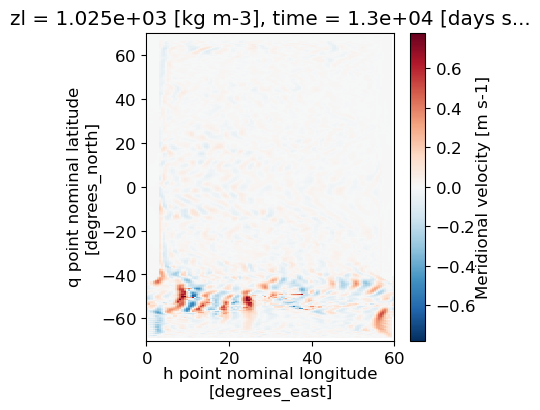

In [154]:
prog.v.isel(zl=6).plot()

In [212]:
(grid.interp(prog.h,'X') * CAu * static.dxCu * static.dyCu).sum(['xq','yh'])

<xarray.DataArray (zl: 15)>
array([-5.85880880e+07,  7.08752086e+08,  1.71307696e+06,  1.91311587e+08,
       -2.19275153e+07, -7.82985548e+08, -3.84421229e+08, -4.48322296e+08,
       -2.41569291e+07,  4.97089017e+07,  2.29474313e+07, -8.46038218e+07,
        4.21013324e+08,  6.22668748e+08, -2.63327612e+07])
Coordinates:
    time     float64 1.3e+04
Dimensions without coordinates: zl

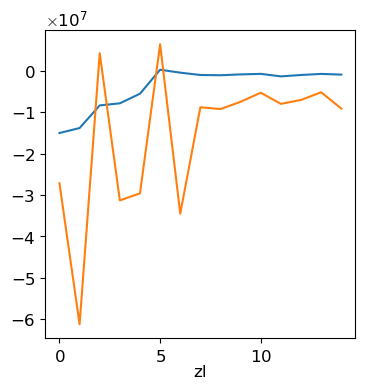

In [219]:
(grid.interp(prog.h,'X') * leo_y * static.dxCu * static.dyCu).sum(['xq','yh']).plot()
(grid.interp(prog.h,'X') * by*20 * static.dxCu * static.dyCu).sum(['xq','yh']).plot()

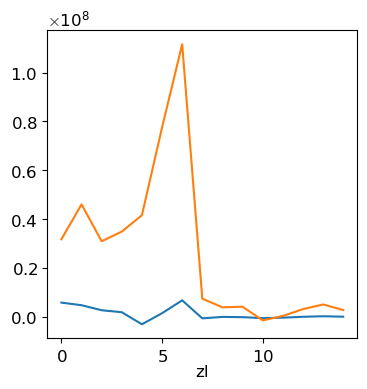

In [220]:
(grid.interp(prog.h,'Y') * leo_x * static.dxCv * static.dyCv).sum(['xh','yq']).plot()
(grid.interp(prog.h,'Y') * bx*20 * static.dxCv * static.dyCv).sum(['xh','yq']).plot()

In [270]:
def momx(bx):
    return (grid.interp(prog.h,'Y') * bx * static.dxCv * static.dyCv).sum(['xh','yq'])

In [230]:
def limit_vorticity_flux(bx, by, vort_xy, vmax):
    max_flux = vmax * np.abs(grid.interp(vort_xy,'X'))
    bx_ = np.maximum(np.minimum(bx, max_flux), - max_flux)
    max_flux = vmax * np.abs(grid.interp(vort_xy,'Y'))
    by_ = np.maximum(np.minimum(by, max_flux), - max_flux)
    return bx_, by_

In [274]:
leo_x_, leo_y_ = limit_vorticity_flux(leo_x, leo_y, dyn['vort_xy'], 0.1)

In [286]:
bx_base, by_base = bx*20, by*20
bx_base_, by_base_ = limit_vorticity_flux(bx_base, by_base, dyn['vort_xy'], 1)

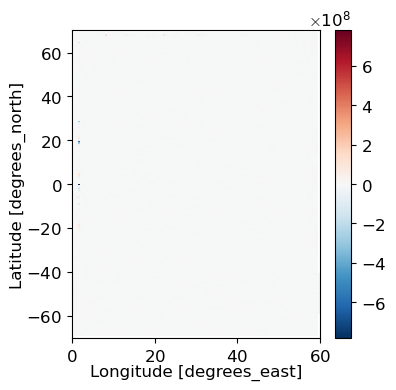

In [287]:
(bx_base/ (grid.interp(dyn['vort_xy'],'X'))).isel(zl=5).plot()

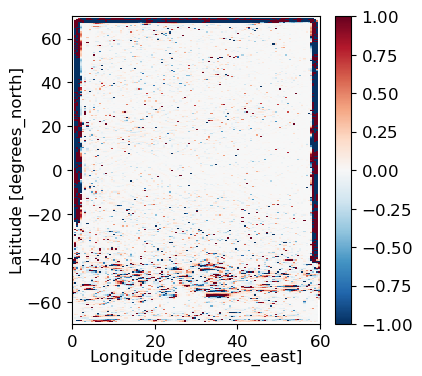

In [288]:
(bx_base_/ (grid.interp(dyn['vort_xy'],'X'))).isel(zl=5).plot()

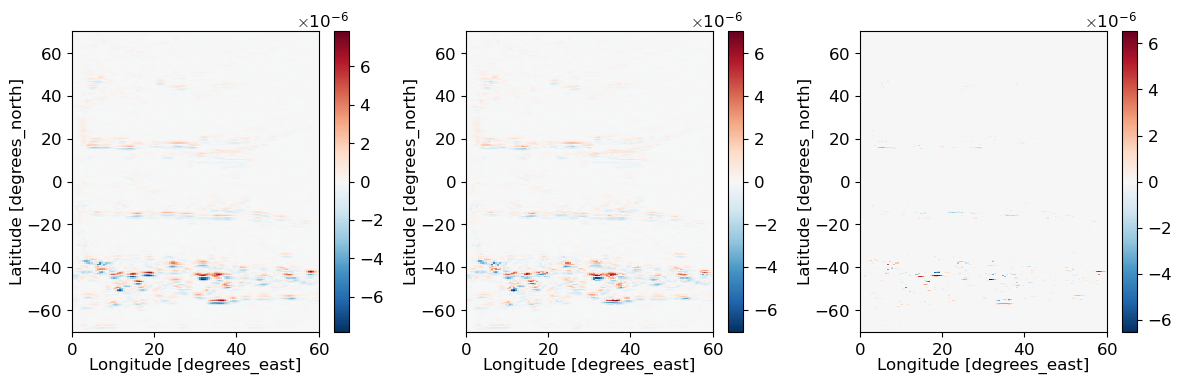

In [295]:
zl=-15
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
bx_base.isel(zl=zl).plot()
plt.subplot(1,3,2)
bx_base_.isel(zl=zl).plot()
plt.subplot(1,3,3)
(bx_base_-bx_base).isel(zl=zl).plot()
plt.tight_layout()

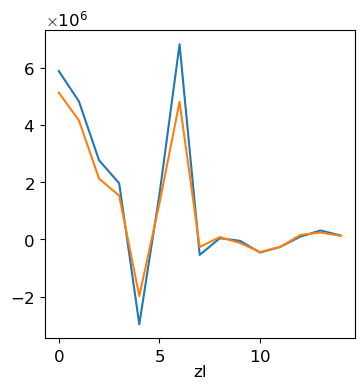

In [278]:
momx(leo_x).plot()
momx(leo_x_).plot()